In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
import patsy as pt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [4]:
# Question 4
# Function to plot classifiers with support vectors
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)



In [7]:
# Prepare data
control = 3  # Controls how mixed the classes can be.
np.random.seed(5)
X = np.random.randn(100,2)
y = np.random.choice([-1,1],100)
X[y == 1] = X[y == 1] - control

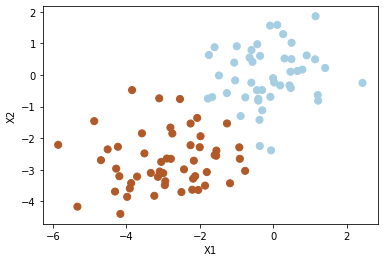

In [17]:
plt.scatter(X[:,0], X[:,1], s=50, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [18]:
# Split data into train and test 
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state=1)

In [19]:
# Linear SVC
svc = SVC(kernel='linear', random_state=1)
svc.fit(x_train,y_train)

SVC(kernel='linear', random_state=1)

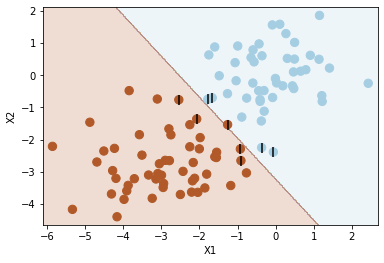

Number of support vectors:  9


In [20]:
plot_svc(svc, X, y)

In [22]:
# Confusion matrices
print('Confusion matrix for train set: ', confusion_matrix(y_train, svc.predict(x_train)))
print('Confusion matrix for test set: ', confusion_matrix(y_test, svc.predict(x_test)))

Confusion matrix for train set:  [[37  0]
 [ 1 42]]
Confusion matrix for test set:  [[10  0]
 [ 0 10]]


In [23]:
# Error rate
print('Error rate for train set: ', (0+1)/(37+0+1+42))
print('Error rate for test set: ', (0+0)/(10+0+0+10))


Error rate for train set:  0.0125
Error rate for test set:  0.0


In [24]:
# Polynomial SVC
svc = SVC(kernel='poly', random_state=1)
svc.fit(x_train,y_train)


SVC(kernel='poly', random_state=1)

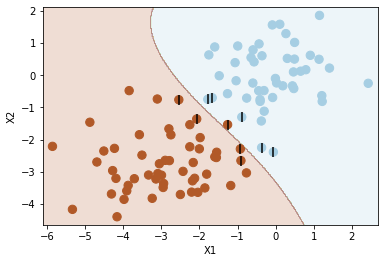

Number of support vectors:  10


In [25]:
plot_svc(svc, X, y)

In [27]:
print('Confusion matrix for train set: ', confusion_matrix(y_train, svc.predict(x_train)))
print('Confusion matrix for test set: ', confusion_matrix(y_test, svc.predict(x_test)))


Confusion matrix for train set:  [[37  0]
 [ 1 42]]
Confusion matrix for test set:  [[10  0]
 [ 0 10]]


In [28]:
print('Error rate for train set: ', (1+0)/(37+0+0+42))
print('Error rate for test set: ', (0+0)/(10+0+0+10))

Error rate for train set:  0.012658227848101266
Error rate for test set:  0.0


In [31]:
svc = SVC(kernel='rbf', random_state=1)
svc.fit(x_train,y_train)


SVC(random_state=1)

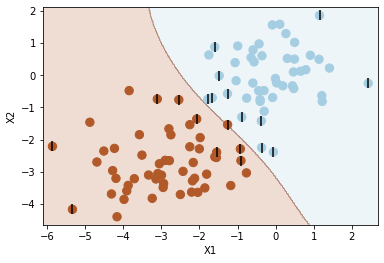

Number of support vectors:  20


In [32]:
plot_svc(svc, X, y)

In [33]:
print('Confusion matrix for train set: ', confusion_matrix(y_train, svc.predict(x_train)))
print('Confusion matrix for test set: ', confusion_matrix(y_test, svc.predict(x_test)))


Confusion matrix for train set:  [[37  0]
 [ 1 42]]
Confusion matrix for test set:  [[10  0]
 [ 0 10]]


In [34]:
print('Error rate for train set: ', (1+0)/(37+0+0+42))
print('Error rate for test set: ', (0+0)/(10+0+0+10))

Error rate for train set:  0.012658227848101266
Error rate for test set:  0.0


In [35]:
# Findings:
# linear kernel performed better here, poly and radial showed same result where poly was less flexible than radial.
# Although this may not be the case always

In [37]:
# Question 5(a)
np.random.seed(0)
x1 = np.random.uniform(0,1,500)-0.5
x2 = np.random.uniform(0,1,500)-0.5
y = 1*(x1**2 - x2**2 > 0)

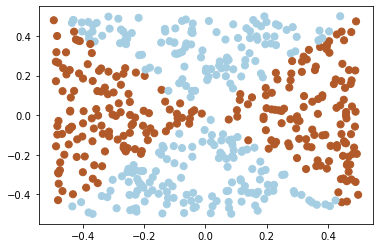

In [41]:
# 5(b)
plt.scatter(x1, x2, s=50, c=y, cmap=plt.cm.Paired);


In [50]:
# 5(c and d)
# Pre-process data with only linear features
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y':y})
f = 'y ~ x1 + x2'
y, X = pt.dmatrices(f, df)

train = np.random.random(len(y)) > 0.5


/Users/mac/Desktop/anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


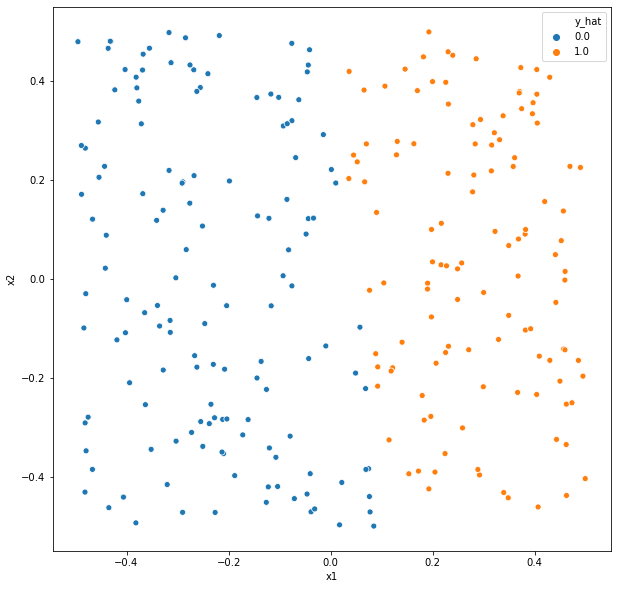

Training accuracy: 0.5984555984555985
Test accuracy    : 0.5228215767634855


In [54]:
# Fit model on training set
model = LogisticRegression().fit(X[train], y[train])
# Predict
y_hat = model.predict(X[train])

# Plot data
plot_df = pd.DataFrame({'x1':X[train][:,1], 'x2':X[train][:,2], 'y_hat':y_hat})
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue='y_hat', data=plot_df)
plt.show();

print(f'Training accuracy: {model.score(X[train], y[train])}')
print(f'Test accuracy    : {model.score(X[~train], y[~train])}')


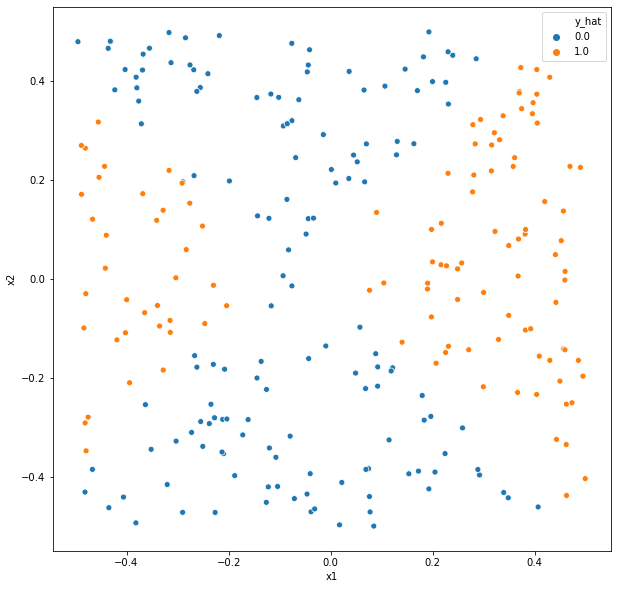

Training accuracy: 0.8957528957528957
Test accuracy    : 0.8506224066390041


In [55]:
# 5(e and f)
# Pre-process data with quadratic features

f = 'y ~ x1 + x2 + np.power(x1, 2) + np.power(x2, 2)'
y, X = pt.dmatrices(f, df)
y = np.ravel(y)

# Fit model on training set
model = LogisticRegression().fit(X[train], y[train])
# Predict
y_hat = model.predict(X[train])

# Plot data
plot_df = pd.DataFrame({'x1':X[train][:,1], 'x2':X[train][:,2], 'y_hat':y_hat})
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue='y_hat', data=plot_df)
plt.show();

print(f'Training accuracy: {model.score(X[train], y[train])}')
print(f'Test accuracy    : {model.score(X[~train], y[~train])}')


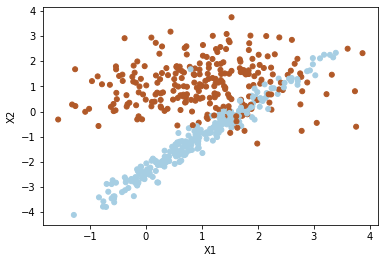

In [98]:
# Question 6(a)
# Generate dataset
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=0)
plt.scatter(X[:,0], X[:,1], s=25, c=y, cmap=plt.cm.Paired);
plt.xlabel('X1')
plt.ylabel('X2');

In [109]:
# 6(b)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1) # split the data
cost_range = [0.01, .1, 1, 10] # Cost range

In [117]:
# Cross-validation error rates
for i in cost_range:
    svc = SVC(kernel='linear', C=i, random_state=1)
    svc.fit(X_train, y_train)
    print('\ni = ', i)
    print('%.3f' % (np.average(1-cross_val_score(svc, X, y, cv=5, scoring='accuracy'))))



i =  0.01
0.142

i =  0.1
0.122

i =  1
0.126

i =  10
0.124


In [118]:
# COnfusion Matrix
for i in cost_range:
    svc = SVC(kernel='linear', C=i, random_state=1)
    svc.fit(X_train, y_train)
    print('\ni =', i)
    print('Confusion matrix: ', confusion_matrix(y_train, svc.predict(X_train)))



i = 0.01
Confusion matrix:  [[153  23]
 [ 27 147]]

i = 0.1
Confusion matrix:  [[167   9]
 [ 32 142]]

i = 1
Confusion matrix:  [[163  13]
 [ 31 143]]

i = 10
Confusion matrix:  [[162  14]
 [ 31 143]]


In [120]:
# Misclassifications
misclass_1 = 23+27
misclass_2 = 9+32
misclass_3 = 13+31
misclass_4 = 14+31

misclass = [misclass_1, misclass_2, misclass_3, misclass_4]

for i in range(0,4):
    print('Misclassifications, i = %.3f, %i' % (cost_range[i], misclass[i]))

# Findings: The cost value with less cross-validation error is C=0.1, which is also the cost value with less misclassifications. 
# This is what we wanted to see because it shows that the training error (evaluated by the number of misclassifications) is in accordance with test error (here evaluated by the cross-validation error).


Misclassifications, i = 0.010, 50
Misclassifications, i = 0.100, 41
Misclassifications, i = 1.000, 44
Misclassifications, i = 10.000, 45


In [121]:
# 6(c)
# Generate dataset
X, y = make_classification(n_samples=500, random_state=1)

In [125]:
X.shape

(500, 20)

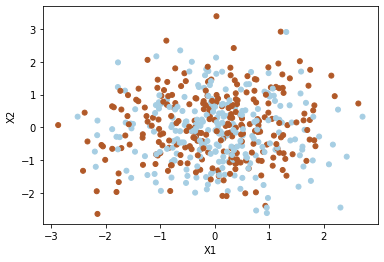

In [127]:
plt.scatter(X[:,0], X[:,1], s=25, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');


In [128]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [135]:
# Test errors
for i in cost_range:
    svc = SVC(kernel='linear', C=i, random_state=1)
    svc.fit(X_train, y_train)
    print('\ni: ', i)
    print('Test error: ', 1-accuracy_score(y_test, svc.predict(X_test)))



i:  0.01
Test error:  0.053333333333333344

i:  0.1
Test error:  0.06000000000000005

i:  1
Test error:  0.07999999999999996

i:  10
Test error:  0.08666666666666667


In [136]:
# Training errors
for i in cost_range:
    svc = SVC(kernel='linear', C=i, random_state=1)
    svc.fit(X_train, y_train)
    print('\ni: ', i)
    print('Training error: ', 1-accuracy_score(y_train, svc.predict(X_train)))



i:  0.01
Training error:  0.0485714285714286

i:  0.1
Training error:  0.05714285714285716

i:  1
Training error:  0.042857142857142816

i:  10
Training error:  0.037142857142857144


In [137]:
# Cross-validation errors
for i in cost_range:
    svc = SVC(kernel='linear', C=i, random_state=1)
    svc.fit(X_train, y_train)
    print('\ni: ', i)
    print('Cross-validation error: ', np.average(1-cross_val_score(svc, X, y, scoring='accuracy', cv=5)))



i:  0.01
Cross-validation error:  0.052000000000000025

i:  0.1
Cross-validation error:  0.05600000000000001

i:  1
Cross-validation error:  0.06200000000000001

i:  10
Cross-validation error:  0.072


In [139]:
# Findings: The fewest training error is reached when the cost value is 10, while the fewest cross-validation errors occurs when the cost value is 0.01. The fewest cross-validation error is also when the cost value is 0.01.


In [141]:
# Question 7
auto = pd.read_csv("auto.csv")

In [161]:
# 7(a)
auto = auto.drop(auto[auto.values == '?'].index) # Remove observations with missing values
# convet quantitive values to floats
quants = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
auto[quants] = auto[quants].astype(np.float64)
auto['mpg_above_median'] = (auto['mpg'] > auto['mpg'].median()) *1.
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_above_median
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,0.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,0.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,0.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,0.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,0.0


In [164]:
auto['mpg_above_median'].unique()

array([0., 1.])

In [166]:
# 7(b)
f = 'mpg_above_median ~ cylinders + displacement + horsepower + weight + acceleration + year + C(origin)'
y, X = pt.dmatrices(f, auto)
# Scale data
X = preprocessing.scale(X)
y = np.ravel(y)


In [168]:
costs = np.logspace(-5, 2, 20)
scores = []
for i in costs:
    # Get cv score 
    model = SVC(kernel='linear', C=i, random_state=0)
    score = np.mean(cross_val_score(model, preprocessing.scale(X), y, cv=5))
    scores += [[i, score]]
    #print(f'progress: {list(costs).index(i)} of {len(costs)}')

columns=['Cost', 'CV_accuracy']
results_df = pd.DataFrame(data=np.asarray(scores), columns=columns)

display(results_df)


,Cost,CV_accuracy
0,0.000010,0.630802
1,0.000023,0.630802
2,0.000055,0.630802
3,0.000127,0.630802
4,0.000298,0.681435
5,0.000695,0.818306
6,0.001624,0.877215
7,0.003793,0.882376
8,0.008859,0.902889
9,0.020691,0.895326


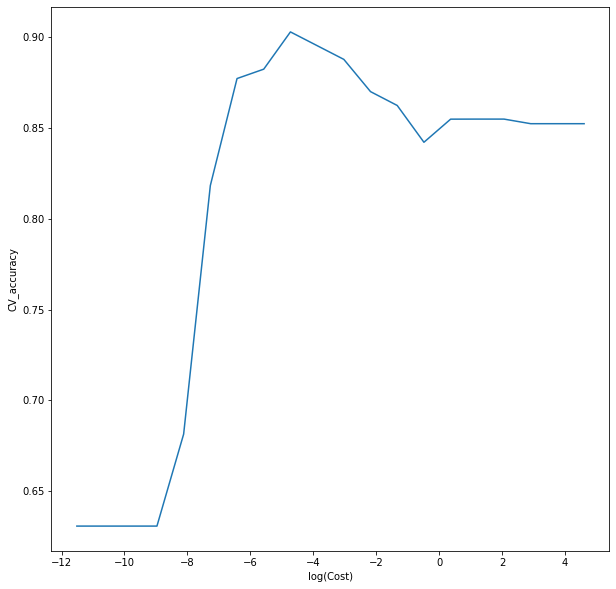

In [169]:
results_df['log(Cost)'] = np.log(results_df['Cost'])
plt.figure(figsize=(10,10))
sns.lineplot(x='log(Cost)', y='CV_accuracy', data=results_df);


In [173]:
# Grid search for best classifier
# https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py
# ----------------------------------------------------------------

C_range     = np.logspace(-5, 3, 10)
gamma_range = np.logspace(-5, 3, 10)
kernels     = ['rbf', 'poly']
degrees     = [3, 5, 7, 9]     # Using only odd values, because I noticed earlier evens are slow!
param_grid  = dict(gamma=gamma_range, C=C_range, kernel=kernels, degree=degrees)
rbf_grid = GridSearchCV(SVC(cache_size=2000), param_grid=param_grid, cv=5, 
                        scoring='accuracy', return_train_score=True)
rbf_grid.fit(X, y)


GridSearchCV(cv=5, estimator=SVC(cache_size=2000),
             param_grid={'C': array([1.00000000e-05, 7.74263683e-05, 5.99484250e-04, 4.64158883e-03,
       3.59381366e-02, 2.78255940e-01, 2.15443469e+00, 1.66810054e+01,
       1.29154967e+02, 1.00000000e+03]),
                         'degree': [3, 5, 7, 9],
                         'gamma': array([1.00000000e-05, 7.74263683e-05, 5.99484250e-04, 4.64158883e-03,
       3.59381366e-02, 2.78255940e-01, 2.15443469e+00, 1.66810054e+01,
       1.29154967e+02, 1.00000000e+03]),
                         'kernel': ['rbf', 'poly']},
             return_train_score=True, scoring='accuracy')

In [174]:
pd.DataFrame(rbf_grid.cv_results_).sort_values('rank_test_score', ascending=True)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
526,0.001911,0.000058,0.000686,0.000011,2.15443,7,0.00464159,rbf,"{'C': 2.154434690031882, 'degree': 7, 'gamma':...",0.936709,...,0.902921,0.027958,1,0.916933,0.907348,0.923567,0.910828,0.917197,0.915175,0.005617
486,0.002086,0.000219,0.000812,0.000146,2.15443,3,0.00464159,rbf,"{'C': 2.154434690031882, 'degree': 3, 'gamma':...",0.936709,...,0.902921,0.027958,1,0.916933,0.907348,0.923567,0.910828,0.917197,0.915175,0.005617
546,0.002118,0.000377,0.000726,0.000078,2.15443,9,0.00464159,rbf,"{'C': 2.154434690031882, 'degree': 9, 'gamma':...",0.936709,...,0.902921,0.027958,1,0.916933,0.907348,0.923567,0.910828,0.917197,0.915175,0.005617
506,0.002022,0.000206,0.000764,0.000139,2.15443,5,0.00464159,rbf,"{'C': 2.154434690031882, 'degree': 5, 'gamma':...",0.936709,...,0.902921,0.027958,1,0.916933,0.907348,0.923567,0.910828,0.917197,0.915175,0.005617
390,0.003417,0.000083,0.000967,0.000014,0.0359381,9,0.278256,rbf,"{'C': 0.03593813663804626, 'degree': 9, 'gamma...",0.949367,...,0.900325,0.033167,5,0.900958,0.907348,0.917197,0.910828,0.914013,0.910069,0.005610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.002885,0.000285,0.000855,0.000046,7.74264e-05,7,1000,rbf,"{'C': 7.742636826811278e-05, 'degree': 7, 'gam...",0.493671,...,0.497468,0.003101,777,0.501597,0.501597,1.000000,1.000000,1.000000,0.800639,0.244166
78,0.002720,0.000020,0.000822,0.000005,1e-05,9,1000,rbf,"{'C': 1e-05, 'degree': 9, 'gamma': 1000.0, 'ke...",0.493671,...,0.497468,0.003101,777,0.501597,0.501597,1.000000,1.000000,1.000000,0.800639,0.244166
278,0.003168,0.000422,0.000934,0.000055,0.00464159,5,1000,rbf,"{'C': 0.004641588833612777, 'degree': 5, 'gamm...",0.493671,...,0.497468,0.003101,777,0.501597,0.501597,1.000000,1.000000,1.000000,0.800639,0.244166
158,0.002725,0.000026,0.000827,0.000005,7.74264e-05,9,1000,rbf,"{'C': 7.742636826811278e-05, 'degree': 9, 'gam...",0.493671,...,0.497468,0.003101,777,0.501597,0.501597,1.000000,1.000000,1.000000,0.800639,0.244166


In [185]:
# Question 8
df = pd.read_csv("oj.csv")
df.shape

(1070, 18)

In [186]:
df.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [187]:
# Define predictors and response 
X = df.drop(axis=1, labels=['Purchase'])
y = df['Purchase']


In [196]:
# Dummy variables to transform qualitative into quantitative variables
X = pd.get_dummies(X)
X.head()

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Store7_No,Store7_Yes
0,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0.000000,0.000000,0.24,1,1,0
1,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0.150754,0.000000,0.24,1,1,0
2,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0.000000,0.091398,0.23,1,1,0
3,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0.000000,0.000000,0.00,1,1,0
4,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,0.000000,0.000000,0.00,0,0,1


In [198]:
# 8(a)
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=800, random_state=1)

In [199]:
# 8(b)
# Fit SVC to data
svc = SVC(C=0.01, kernel='linear', random_state=1)
svc.fit(X_train, y_train)


SVC(C=0.01, kernel='linear', random_state=1)

In [200]:
# Number of support vectors for each class
svc.n_support_


array([307, 304], dtype=int32)

In [203]:
# Findings:
# In our dataset, we have 800 observations, 2 classes, and a total of 611 support vectors.
# From those support vectors, 307 belong to class CH and 304 to class MM.


In [204]:
# 8(c)
# Confusion matrix
print('Train confusion matrix: ', confusion_matrix(y_train, svc.predict(X_train)))
print('Test confusion matrix: ', confusion_matrix(y_test, svc.predict(X_test)))


Train confusion matrix:  [[489   7]
 [241  63]]
Test confusion matrix:  [[150   7]
 [ 90  23]]


In [205]:
# Error rate
train_err = (7+241)/(489+7+241+63)
test_err = (7+90)/(150+7+90+23)

print('Train error rate: ', train_err)
print('Test error rate: ', test_err)


Train error rate:  0.31
Test error rate:  0.3592592592592593


In [206]:
# 8(d)
# Since the selection of an optimal cost is a hypertuning parameter operation, we will use the GridSearchCV.

# Hypertune cost using GridSearchCV
svc = SVC(kernel='linear', random_state=1)

parameters = {'C':np.arange(0.01, 10, 2)}

clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)



GridSearchCV(estimator=SVC(kernel='linear', random_state=1),
             param_grid={'C': array([0.01, 2.01, 4.01, 6.01, 8.01])})

In [207]:
# Best value for cost
clf.best_params_


{'C': 2.01}

In [208]:
# 8(e)
# Confusion matrix
print('Train confusion matrix: ', confusion_matrix(y_train, clf.predict(X_train)))
print('Test confusion matrix: ', confusion_matrix(y_test, clf.predict(X_test)))


Train confusion matrix:  [[436  60]
 [ 72 232]]
Test confusion matrix:  [[143  14]
 [ 30  83]]


In [209]:
# Error rate
train_err = (59+75)/(437+59+75+229)
test_err = (13+35)/(144+13+35+78)

print('Train error rate: ', train_err)
print('Test error rate: ', test_err)


Train error rate:  0.1675
Test error rate:  0.17777777777777778


In [213]:
# 8(f)
# Fit SVC to data
svc = SVC(C=0.01, kernel='rbf', random_state=1)
svc.fit(X_train, y_train)


SVC(C=0.01, random_state=1)

In [214]:
svc.n_support_


array([304, 304], dtype=int32)

In [215]:
# Confusion matrix
print('Train confusion matrix: ', confusion_matrix(y_train, svc.predict(X_train)))
print('Test confusion matrix: ', confusion_matrix(y_test, svc.predict(X_test)))


Train confusion matrix:  [[496   0]
 [304   0]]
Test confusion matrix:  [[157   0]
 [113   0]]


In [216]:
# Error rate
train_err = (0+304)/(496+0+304+0)
test_err = (0+113)/(157+0+113+0)

print('Train error rate: ', train_err)
print('Test error rate: ', test_err)


Train error rate:  0.38
Test error rate:  0.4185185185185185


In [217]:
# Hypertune cost using GridSearchCV
svc = SVC(kernel='rbf', random_state=1)

parameters = {'C':np.arange(0.01, 10, 2)}

clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)


GridSearchCV(estimator=SVC(random_state=1),
             param_grid={'C': array([0.01, 2.01, 4.01, 6.01, 8.01])})

In [218]:
clf.best_params_


{'C': 0.01}

In [219]:
# Confusion matrix
print('Train confusion matrix: ', confusion_matrix(y_train, clf.predict(X_train)))
print('Test confusion matrix: ', confusion_matrix(y_test, clf.predict(X_test)))


Train confusion matrix:  [[496   0]
 [304   0]]
Test confusion matrix:  [[157   0]
 [113   0]]


In [220]:
# Error rate
train_err = (40+78)/(456+40+78+226)
test_err = (11+36)/(146+11+36+77)

print('Train error rate: ', train_err)
print('Test error rate: ', test_err)


Train error rate:  0.1475
Test error rate:  0.17407407407407408


In [228]:
# 8(g)
# Fit SVC to data
svc = SVC(C=0.01, kernel='poly', degree=2, random_state=1)
svc.fit(X_train, y_train)


SVC(C=0.01, degree=2, kernel='poly', random_state=1)

In [229]:
svc.n_support_


array([304, 304], dtype=int32)

In [230]:
# Confusion matrix
print('Train confusion matrix: ', confusion_matrix(y_train, svc.predict(X_train)))
print('Test confusion matrix: ', confusion_matrix(y_test, svc.predict(X_test)))


Train confusion matrix:  [[496   0]
 [304   0]]
Test confusion matrix:  [[157   0]
 [113   0]]


In [231]:
# Error rate
train_err = (0+304)/(496+0+304+0)
test_err = (0+113)/(157+0+113+0)

print('Train error rate: ', train_err)
print('Test error rate: ', test_err)


Train error rate:  0.38
Test error rate:  0.4185185185185185


In [236]:
# Hypertune cost using GridSearchCV
svc = SVC(kernel='poly', degree = 2, random_state=1)

parameters = {'C':np.arange(0.01, 10, 2)}

clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)


GridSearchCV(estimator=SVC(degree=2, kernel='poly', random_state=1),
             param_grid={'C': array([0.01, 2.01, 4.01, 6.01, 8.01])})

In [237]:
clf.best_params_


{'C': 0.01}

In [238]:
# Confusion matrix
print('Train confusion matrix: ', confusion_matrix(y_train, clf.predict(X_train)))
print('Test confusion matrix: ', confusion_matrix(y_test, clf.predict(X_test)))


Train confusion matrix:  [[496   0]
 [304   0]]
Test confusion matrix:  [[157   0]
 [113   0]]


In [239]:
# Error rate
train_err = (0+304)/(496+0+304+0)
test_err = (0+113)/(157+0+113+0)

print('Train error rate: ', train_err)
print('Test error rate: ', test_err)


Train error rate:  0.38
Test error rate:  0.4185185185185185
